# Finding the Minimum of a Function - Multiple Approaches

<p>Many machine learning algorithms are optimized by finding the value of weights that minimize a loss function. This minimization is done using numerical optimization techniques, with one popular method being gradient descent. In this exercise you will find the minimum of a function using visual, brute force and gradient descent techniques. In our implementation of gradient descent, we will also explore how what we call the "learning rate" determines how fast it takes to find the minimum point.

### Import Packages

Before you get started, import a few packages. Run the code cell below. 

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

 ## Step 1: Define a Function

Our goal in this exercise will be to use different methods to find the value of $x$ that minimizes a function. We will define a mathematical function to work with. The particular function we will work with is governed by the following equation:<br><br>
<center>$f(x) = 0.001 * (3*x-1)^4 + 1.5*(2*x-4)^2+5*x+7$</center><br>
Our first task will be to implement this equation as a Python function.

The code cell below contains a function definition for function `f_x` that takes in a single input `x`. The function `f_x` will compute the above equation and return the result. Complete the function below by implementing the equation above and assigning the result to variable `result`.

### Graded Cell

The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code.

In [4]:
def f_x(x):  # Do not remove this line of code
    
    result = 0.001 * (3*x - 1)**4 + 1.5 * (2*x - 4)**2 + 5*x + 7
    
    return result # Do not remove this line of code

### Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell.

In [5]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testFX

try:
    p, err = testFX(f_x)
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!


## Step 1: Find the Minimum of a Function Visually 

We will plot this function over a range of inputs. This won't give us a very precise estimate of the value of $x$ that minimizes the function, but it should help us understand the general region where the function is minimized.

Complete the code cell below by performing the following steps:
1. Create a list containing multiple values of $x$. Use the NumPy `np.linspace()` function to create 1000 points in the range (-10, 10). Save the result to the variable `xs`.
2. Call `f_x()` for every value in `xs` and store the result in a list called `ys`.

The last line in the code cell uses Seaborn to create a lineplot where `x=xs` and `y=ys`. Try to visually identify the minimum point.

For more information on using the `np.linspace()` function, consult the online [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html).

### Graded Cell

The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code.

<AxesSubplot:>

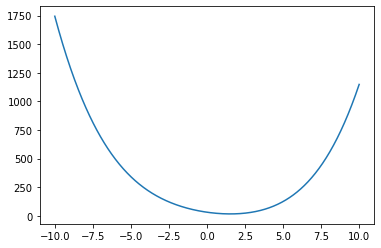

In [6]:
xs = np.linspace(-10, 10, 1000)
ys = [f_x(x) for x in xs]
sns.lineplot(x=xs, y=ys) # Do not remove this line of code

### Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell.

In [7]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testxsys

try:
    p, err = testxsys(xs, ys, f_x)
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!


## Step 2: Find the Minimum of a Function Using a Brute Force Approach

Now we will try to find the input that minimizes the function `f_x` in a more brute force way. When we say "brute force" we just mean looping through a reasonable range of inputs and finding the one that produces the lowest value of `f_x`. We have technically done part of this in the steps above. All we have to do is identify which value of $x$ contained in list `xs` produces the lowest `f_x`.

In the code cell below, do the following:
1. Use NumPy's `argmin()` function to find the position of `ys` that has the lowest value. Assign the result to variable `x_pos`.
2. Use `x_pos` to index into list `xs` to get the corresponding value that minimizes `f_x`. Assign the result to the variable  `x_min`.
3. Print `x_min`.

For more information on using the `np.argmin()` function, consult the online [documentation](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html).

### Graded Cell

The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code.

In [8]:
x_pos = np.argmin(ys)
x_min = xs[x_pos]
x_min

1.531531531531531

### Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell.

In [9]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testBF

try:
    p, err = testBF(xs, ys, x_min, x_pos)
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!


## Step 3: Find the Minimum of a Function Using Gradient Descent

Now we will use gradient descent to find the minimum of function `f_x`. We will follow the methods taught in the videos to accomplish this. We will do the following:

1. Implement a Python function named `gradient()` that computes the gradient of the function `f_x`.
2. Implement a Python function named `hessian()` that returns the Hessian of the function `f_x`. This will be used to compute the learning rates.
3. Create a Python function `gradient_descent()` that implements all of the steps of gradient descent.

The following is the equation for the gradient of our function `f_x`. <br><br>
<center>$grad(x) = 0.012 * (3*x-1)^3 + 12*x-19$</center>

In the code cell below, complete the Python function called `gradient()` that returns the gradient of `f_x`. It will take a single input `x` and return the result of the gradient equation.

Implement the gradient equation above and assign the result to variable `result`. 

### Graded Cell

The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code.

In [12]:
def gradient(x): # Do not remove this line of code
    result = 0.012 * (3*x - 1)**3 + 12*x - 19
    
    return result # Do not remove this line of code


### Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell.

In [13]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testGradient

try:
    p, err = testGradient(gradient)
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!


We are also going to use the 2nd derivative of `f_x`, also known as the "Hessian", to dynamically compute learning rates. The equation for the Hessian is below:<br><br>

<center>$Hess(x) =  0.108 * (3*x-1)^2+12$</center>

In the code cell below, complete the Python function called `hessian()` that implements this Hessian. It will take a single input `x` and return the result of the Hessian equation.

Implement the Hessian equation above and assign the result to variable `result`. 

### Graded Cell

The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code.

In [16]:
def hessian(x): # Do not remove this line of code

    result = 0.108 * (3*x - 1)**2 + 12
   
     
    return result # Do not remove this line of code

### Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell.

In [17]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testHessian

try:
    p, err = testHessian(hessian)
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!


Next we will create a Python function that implements all steps of gradient descent. It returns two values: 1. the value of $w$ that minimizes the function 2. the number of steps that it took to reach convergence.

The code cell below contains a shell of a function named `gradient_descent()`. Your task is to complete the code within the loop, which performs the core logic of a gradient update step.

Complete the following steps within the loop of the `gradient_descent()` function below:
1. Use the `gradient()` function to compute the gradient. Call the `gradient()` function with `w_prior` as an argument. Assign the result to variable `grad`
2. Compute the learning rate (also known as "step size"). Call the `hessian()` function with `w_prior` as an argument. Get the inverse of the result and assign it to variable `learning_rate`. Note: In the video's code sample, the learning rate is represented by the variable `stepsize`.
3. Perform the gradient update step as $w_{t+1}=w_t-(step size) * (gradient)$. Assign the result to variable `w`. Note that $w_{t+1}$ is represented by `w` and $w_t$ is represented by `w_prior`.
4. Check for convergence. If the absolute value of `w-w_prior` is less than the `tolerance` then break from the loop. Use the NumPy function `np.abs()` to find the absolute value.
5. Set `w_prior` to the current value of `w` (must be done after checking for convergence, so make sure to follow step 4 above and break out from the loop if the condition fails).

### Graded Cell

The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code.

In [29]:
def gradient_descent(w_0, #initial starting point (scalar),
                     hessian, # function used to compute learning rate (step size) 
                     gradient, # function used to compute the gradient
                     tolerance=10**-6, #difference for convergence testing
                     max_iter=100 #maximum number of updates to run
                    ):
    
    #record prior value for convergence testing
    w_prior = w_0 
    
    for i in range(max_iter):
        
        #---DO NOT DELETE OR EDIT THE CODE ABOVE THIS LINE-----------------------------|  
        #---Write Your Code Below -----------------------------|
        
        #1. compute gradient at current level using the gradient() function
        
        grad= gradient(w_prior)
        #2. compute learning rate at current level using the hessian() function
        learning_rate = 1 / hessian(w_prior)
        
        #3. update the next weight w based on w_prior, learning rate and grad
        w = w_prior - learning_rate * grad
        
        #4. check for convergence
        if np.abs(w - w_prior) < tolerance:
            return w, i
            
        #5. set w_prior to current w
        w_prior = w
        
        #---DO NOT DELETE OR EDIT THE CODE BELOW THIS LINE-----------------------------|  

    
    return w, i

### Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell.

In [30]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testGD
try:
    p, err = testGD(gradient_descent, hessian, gradient)
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    

Correct!


Now let's run the `gradient_descent()` function. The code cell below calls the `gradient_descent()` function using `0` as the initial guess of the weight. It also passes the functions `hessian()` and `gradient()` as arguments. Run the cell and inspect the results. The first value returned by the `gradient_descent()` function is the value of $w$ that minimizes the function `f_x`. Compare this value to the value returned by the 'brute force' approach above. Are they close?

In [31]:
value_of_w, convergence_speed = gradient_descent(0, hessian, gradient)
print(value_of_w)
print(convergence_speed)

1.536327250817171
3


Rather than using the Hessian approach, what if we want to use a constant learning rate?

Note that the second element returned by the `gradient_descent()` function shows the number of steps it took to reach convergence. Let's compare the convergence speed of the Hessian method for computing learning rates to a different method in which we use a constant learning rate.

We will create a new function to replace the `hessian()` function. This new function will return a constant learning rate. We designed the `gradient_descent()` function to accept hessian and gradient functions as arguments. This enables us to pass our new function to `gradient_descent()` to be used in place of the `hessian()` function.

The code cell below:
1. Creates a variable called `learning_rate` and sets its value to 0.01
2. Creates a new function called `h()`. It uses Python's `lambda` to create this function. The function `h()` returns a constant learning rate: `1 / learning_rate`.
3. Calls the `gradient_descent()` function using `0` as the initial guess, the function `h()` as the hessian argument, and the function `gradient()` as the gradient argument.

In [32]:
learning_rate = 0.01

# function that will replaces the hessian() function above
h = lambda x: 1 / learning_rate

gradient_descent(0, h, gradient)

(1.5363209133528162, 86)

Notice the difference in convergence speeds between these two methods.

We are now going to extend this by looping over a range of learning rates, calling the `gradient_descent()` function with each learning rate, and comparing the resulting convergence speeds. This will help illustrate how sensitive the convergence is to the choice of learning rate and to also illustrate why the Hessian approach is better.

The code cell below:
1. Creates a list of learning rates called `learning_rates`using the NumPy `linspace()` function. 
2. Creates an empty list called `results`
3. Uses a `for` loop that iterates over each value of `learning_rates`. Within the loop:
    1. Create a `lambda` function called `h` that returns a constant learning rate: `1 / current_learning_rate`
    2. Calls the `gradient_descent()` function using `0` as the initial guess, the function `h` as the  hessian argument and the function `gradient()` as the gradient argument. 
    3. Stores the resulting convergence speeds.

In [33]:
learning_rates = np.linspace(0.01, 0.1, 20)

convergence_speeds = []

for current_learning_rate in learning_rates:
    h = lambda x: 1 / current_learning_rate
    w, convergence_speed = gradient_descent(0, h, gradient)
    convergence_speeds.append(convergence_speed)

Now let's visualize the results of this analysis. 

Run the code cell below to create a bar chart of our results. Take some time to see what learning rate is best and compare the convergence speed at that learning rate to the convergence speed of the Hessian method. Also notice has sensitive the speed is to the choice of learning rate.

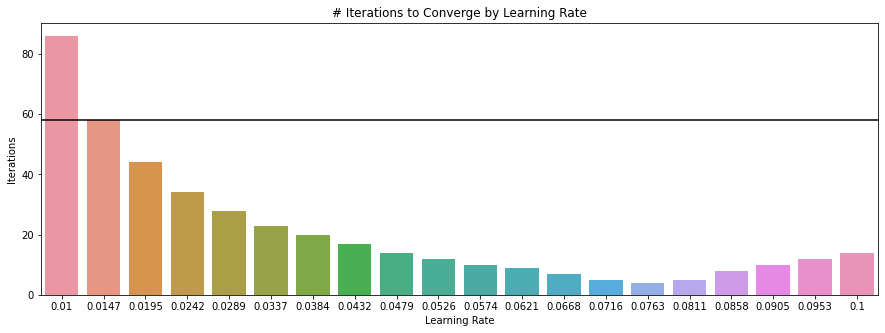

In [34]:
fig = plt.figure(figsize=(15,5))
ax = sns.barplot(x=learning_rates, y=convergence_speeds)
g = ax.set_xticklabels([np.round(x, 4) for x in learning_rates])
plt.title('# Iterations to Converge by Learning Rate')
g = ax.set_xlabel('Learning Rate')
g = ax.set_ylabel('Iterations')
g = plt.axhline(y=convergence_speeds[1],color='black')